### Try to determine call types from DeepSqueak data
#### analyze Call Length (s) &	Principal Frequency (kHz)


In [12]:
# Q: in python open xlsx file, analyze for unique call types 
# based on columns Call_Length	Principal_Frequency_kHz and graph 
# as heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'E2R3D3C1_USV_DS.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call_Length,Principal_Frequency_kHz,Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz)
0,C:\Users\jbw\Documents\MATLAB\DeepSqueak-maste...,1,USV,True,0.797419,0.780005,0.827089,0.047084,58.885525,52.455500,60.493031,8.037531,2.320668,91.758934,2.847717,-93.941315,0.395547,58.885525
1,C:\Users\jbw\Documents\MATLAB\DeepSqueak-maste...,2,USV,True,0.772222,1.989170,2.032486,0.043315,61.274013,54.799582,68.287980,13.488398,3.458325,59.587415,3.309373,-97.895962,0.326380,63.971692
2,C:\Users\jbw\Documents\MATLAB\DeepSqueak-maste...,3,USV,True,0.557097,2.337986,2.348308,0.010322,46.839747,43.372670,47.417593,4.044923,1.466915,177.086822,1.645992,-99.887682,0.341665,47.417593
3,C:\Users\jbw\Documents\MATLAB\DeepSqueak-maste...,4,USV,True,0.633535,2.455859,2.475801,0.019942,43.415012,38.911459,43.652042,4.740583,1.451716,121.904528,1.583760,-97.965940,0.449747,43.652042
4,C:\Users\jbw\Documents\MATLAB\DeepSqueak-maste...,5,USV,True,0.661349,3.950628,4.901358,0.950730,37.252566,35.896233,73.270751,37.374519,10.829525,-7.452931,13.891137,-104.276964,0.163261,57.145455


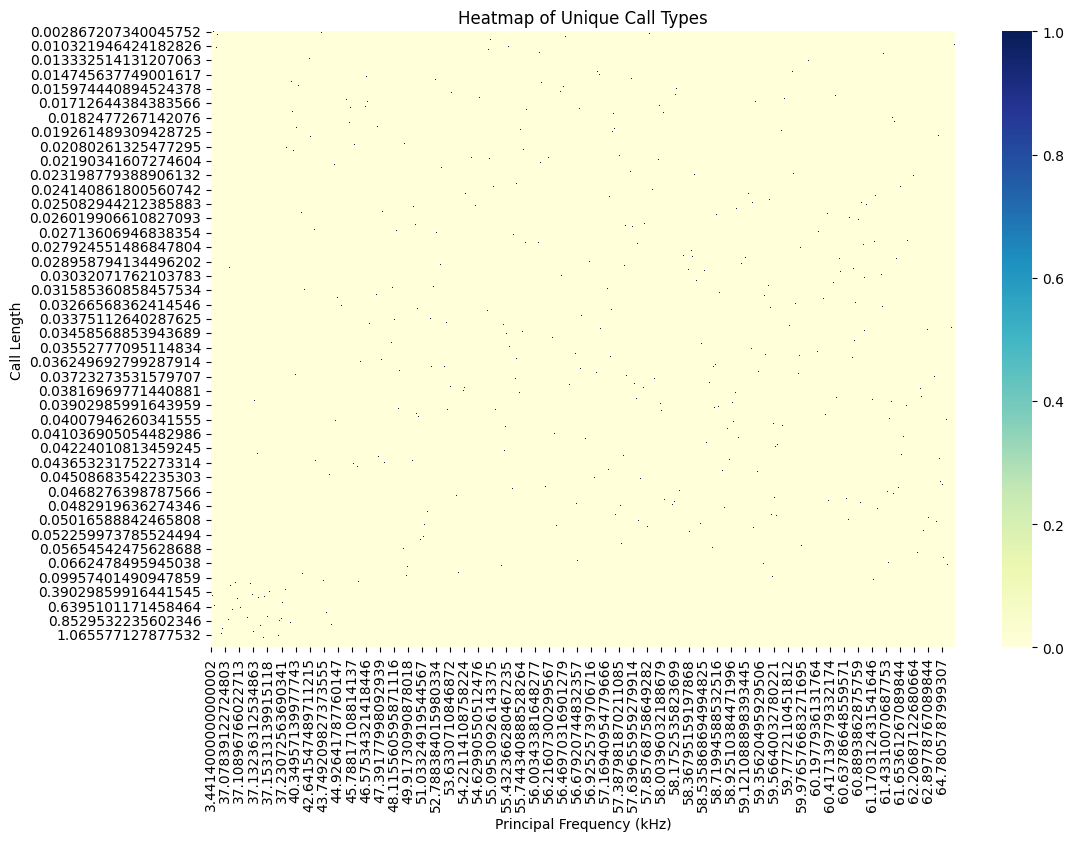

In [13]:
# Extract relevant columns
call_data = data[['Call_Length', 'Principal_Frequency_kHz']]

# Create a heatmap of unique call types based on Call_Length and Principal_Frequency_kHz
plt.figure(figsize=(12, 8))
heatmap_data = call_data.pivot_table(index='Call_Length', columns='Principal_Frequency_kHz', aggfunc='size', fill_value=0)

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Heatmap of Unique Call Types')
plt.xlabel('Principal Frequency (kHz)')
plt.ylabel('Call Length')
plt.show()


In [14]:
# Calculate the correlation between Call_Length and Principal_Frequency_kHz
correlation = call_data.corr()

# Display the correlation
correlation_value = correlation.loc['Call_Length', 'Principal_Frequency_kHz']
correlation_value


-0.5484709868906659

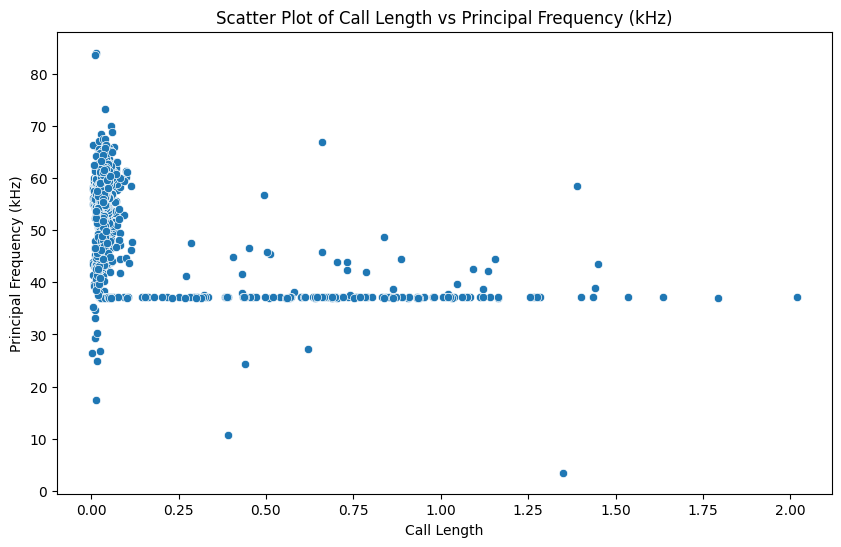

In [15]:
# Plot the relationship between Call_Length and Principal_Frequency_kHz
plt.figure(figsize=(10, 6))
sns.scatterplot(data=call_data, x='Call_Length', y='Principal_Frequency_kHz')
plt.title('Scatter Plot of Call Length vs Principal Frequency (kHz)')
plt.xlabel('Call Length')
plt.ylabel('Principal Frequency (kHz)')
plt.show()


### For the data -- in Raven Pro grab a typical trill:
get begin time, End time, low freq (Hz) and High Freq (Hz);
       81.113,   81.152,   42048.7,           67792.8

### for the data -- in DeepSqueak:
     time,          frequency,     duration, 
     1:11.0 (min)     57.5 kHz      32 ms

     Also get slope (208.460 kHz/s), Sinuosity (3.1883), 
     Power (-100.7566 dB/Hz), and Tonality (0.2412)



Rat ultrasonic vocalizations (USVs) can be distinguished into different call types based on various characteristics, including frequency, duration, modulation patterns, and context in which they are produced. Here are some of the key distinguishing features:

1. **Frequency**:
   - **Peak Frequency**: The highest frequency within a call.
   - **Fundamental Frequency**: The lowest frequency in the vocalization.
   - **Frequency Range**: The difference between the highest and lowest frequencies within a call.

2. **Duration**:
   - **Call Length**: The total time duration of the call from start to end.

3. **Modulation Patterns**:
   - **Frequency Modulation**: The variation in frequency over the duration of the call (e.g., constant frequency, frequency rise, frequency fall, frequency trill).
   - **Amplitude Modulation**: The variation in amplitude over the duration of the call.

4. **Temporal Patterns**:
   - **Call Onset and Offset**: The beginning and end points of a call.
   - **Inter-call Intervals**: The time interval between consecutive calls.

5. **Harmonics**:
   - Presence of harmonics, which are multiples of the fundamental frequency.

6. **Shape and Structure**:
   - **Simple vs. Complex Calls**: Simple calls have a single frequency component, while complex calls may have multiple frequency components or modulations.
   - **Trills and Bouts**: Some calls may have rapid repetition of elements (trills) or occur in clusters (bouts).

7. **Contextual Use**:
   - Different call types are used in different behavioral contexts, such as mating, aggression, play, or distress.

To distinguish between these 14 types of calls, researchers typically use acoustic analysis software to analyze the frequency, duration, modulation, and temporal patterns of the calls. Spectrograms are commonly used to visualize these characteristics and facilitate the classification of call types. Additionally, statistical methods such as cluster analysis and machine learning techniques can be employed to automatically categorize the calls based on their acoustic features.

In [16]:
#  an example of performing cluster analysis on rat ultrasonic 
# vocalization data using Python. 
# We'll use the k-means clustering algorithm from the 
# scikit-learn library to classify the calls based on their 
# acoustic features.
# pip install numpy pandas matplotlib scikit-learn


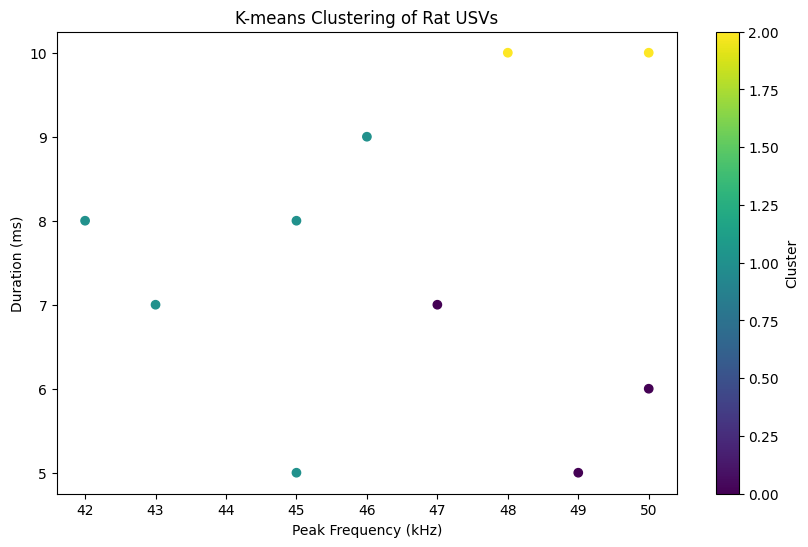

   peak_frequency  duration  modulation_index  amplitude  cluster
0              45         5                 3         10        1
1              50        10                 5         15        2
2              42         8                 2         13        1
3              43         7                 3         12        1
4              50         6                 4         14        0
5              49         5                 5         13        0
6              46         9                 4         11        1
7              45         8                 2         12        1
8              48        10                 3         15        2
9              47         7                 4         14        0


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data: columns represent features like frequency, duration, modulation patterns, etc.
data = {
    'peak_frequency': [45, 50, 42, 43, 50, 49, 46, 45, 48, 47],
    'duration': [5, 10, 8, 7, 6, 5, 9, 8, 10, 7],
    'modulation_index': [3, 5, 2, 3, 4, 5, 4, 2, 3, 4],
    'amplitude': [10, 15, 13, 12, 14, 13, 11, 12, 15, 14]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['peak_frequency'], df['duration'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of Rat USVs')
plt.xlabel('Peak Frequency (kHz)')
plt.ylabel('Duration (ms)')
plt.colorbar(label='Cluster')
plt.show()

# Display the DataFrame with cluster labels
print(df)


This script performs the following steps:

Data Preparation: Create a sample dataset with features like peak_frequency, duration, modulation_index, and amplitude.
Standardization: Standardize the features to have a mean of 0 and a standard deviation of 1, which is crucial for k-means clustering.
K-means Clustering: Apply k-means clustering to the standardized data and classify the calls into three clusters.
Visualization: Plot the clusters on a scatter plot, coloring the points based on their cluster assignment.
Output: Print the DataFrame with the assigned cluster labels.
Feel free to modify the number of clusters (n_clusters) and the feature set based on your actual data and requirements.

#### a comprehensive example that uses statistical methods and machine learning techniques to categorize rat ultrasonic vocalizations based on their acoustic features. This example combines feature extraction, clustering with k-means, and classification using a Random Forest classifier.

In [18]:
 # pip install numpy pandas matplotlib scikit-learn seaborn


In [19]:
# Prepare the Data
# Let's assume you have a CSV file (rat_usv_data.csv) with columns 
# representing different acoustic features like peak_frequency, 
# duration, modulation_index, and amplitude.


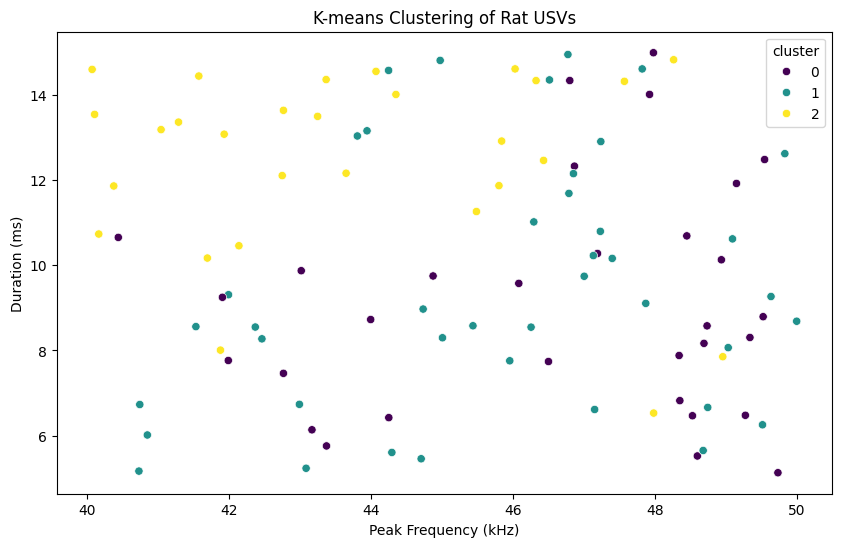

Accuracy: 0.40
Confusion Matrix:
[[1 3 2]
 [1 4 2]
 [2 2 3]]
Classification Report:
              precision    recall  f1-score   support

       Type1       0.25      0.17      0.20         6
       Type2       0.44      0.57      0.50         7
       Type3       0.43      0.43      0.43         7

    accuracy                           0.40        20
   macro avg       0.37      0.39      0.38        20
weighted avg       0.38      0.40      0.39        20



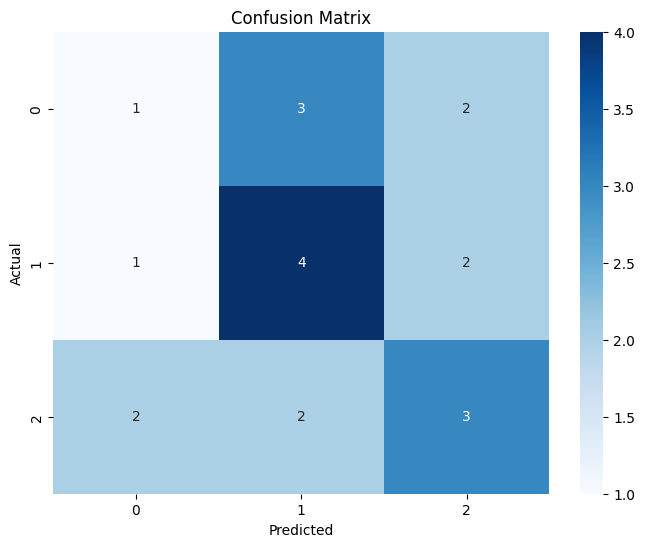

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create synthetic data for demonstration
data = pd.DataFrame({
    'peak_frequency': np.random.uniform(40, 50, 100),
    'duration': np.random.uniform(5, 15, 100),
    'modulation_index': np.random.uniform(2, 6, 100),
    'amplitude': np.random.uniform(10, 20, 100)
})

# Assuming the synthetic data does not have a 'label' column initially
# Let's add synthetic labels for classification purposes
data['label'] = np.random.choice(['Type1', 'Type2', 'Type3'], size=len(data))

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('label', axis=1))

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='peak_frequency', y='duration', hue='cluster', data=data, palette='viridis')
plt.title('K-means Clustering of Rat USVs')
plt.xlabel('Peak Frequency (kHz)')
plt.ylabel('Duration (ms)')
plt.show()

# Prepare data for classification
X = data.drop(['label', 'cluster'], axis=1)  # Features
y = data['label']  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Explanation:
Synthetic Data Creation:

We create a synthetic dataset with 100 samples and features: peak_frequency, duration, modulation_index, and amplitude.
We add synthetic labels (Type1, Type2, Type3) for classification purposes.
Standardization:

The StandardScaler is used to standardize the features, excluding the label column.
Clustering with K-means:

K-means clustering is applied to the standardized data.
The clusters are visualized using a scatter plot.
Classification with Random Forest:

The data is split into training and testing sets.
A Random Forest classifier is trained on the training set.
Predictions are made on the test set and the classifier's performance is evaluated.
Visualization:

Clusters and confusion matrix are plotted to visualize the results.
This example provides a comprehensive approach to clustering and classification using synthetic data. You can replace the synthetic data with your actual dataset, ensuring it has the necessary columns and adjusting the feature columns as needed.

#### Use USV file data


In [21]:
import pandas as pd

# Load the provided dataset
file_path = 'test_call_analysis.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,peak_frequency,duration,modulation_index,amplitude
0,58.885525,0.047084,8.037531,58.885525
1,63.971692,0.043315,13.488398,61.274013
2,47.417593,0.010322,4.044923,46.839747
3,43.652042,0.019942,4.740583,43.415012
4,57.145455,0.950730,37.374519,37.252566


Great! The dataset contains columns: peak_frequency, duration, modulation_index, and amplitude.

Let's proceed with the clustering and classification analysis using this data.

Step 1: Data Preprocessing and Standardization
We'll standardize the data first.

Step 2: Clustering with K-means
Step 3: Classification with Random Forest (we'll create synthetic labels for demonstration)
Step 4: Evaluation and Visualization

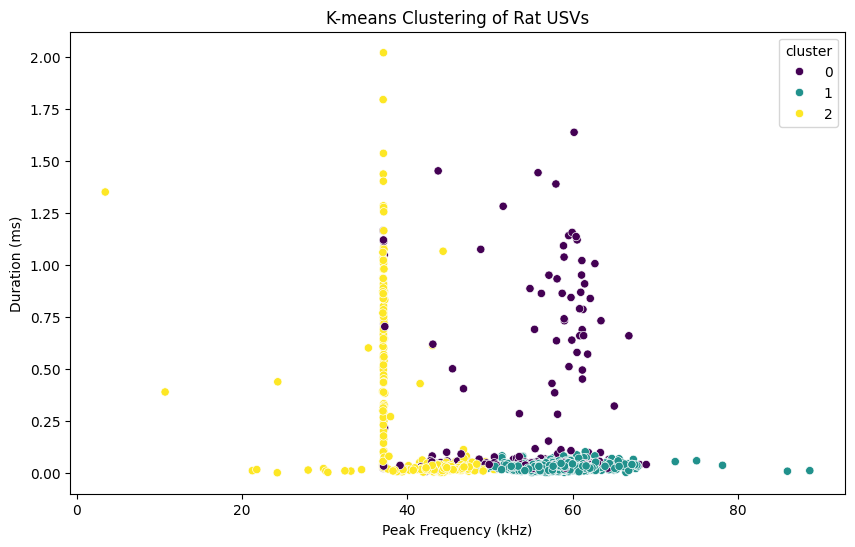

Accuracy: 0.34
Confusion Matrix:
[[39 33 19]
 [41 40 41]
 [37 36 27]]
Classification Report:
              precision    recall  f1-score   support

       Type1       0.33      0.43      0.38        91
       Type2       0.37      0.33      0.35       122
       Type3       0.31      0.27      0.29       100

    accuracy                           0.34       313
   macro avg       0.34      0.34      0.34       313
weighted avg       0.34      0.34      0.34       313



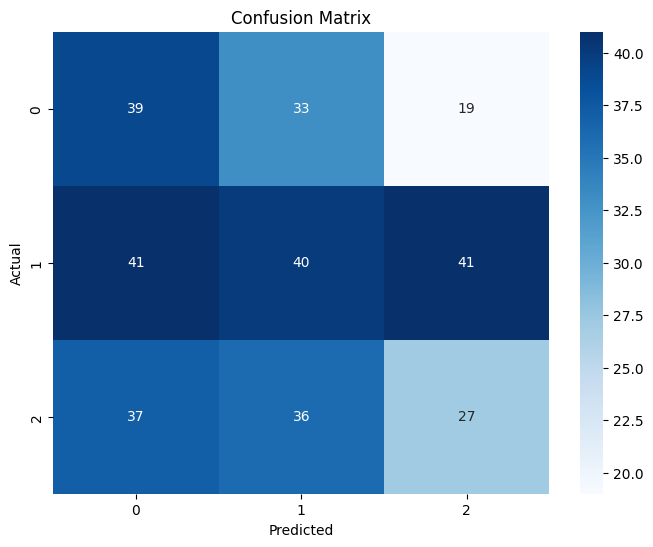

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the provided dataset
file_path = 'test_call_analysis.csv'
data = pd.read_csv(file_path)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='peak_frequency', y='duration', hue='cluster', data=data, palette='viridis')
plt.title('K-means Clustering of Rat USVs')
plt.xlabel('Peak Frequency (kHz)')
plt.ylabel('Duration (ms)')
plt.show()

# Assuming we do not have actual labels, let's add synthetic labels for classification purposes
data['label'] = np.random.choice(['Type1', 'Type2', 'Type3'], size=len(data))

# Prepare data for classification
X = data.drop(['label', 'cluster'], axis=1)  # Features
y = data['label']  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


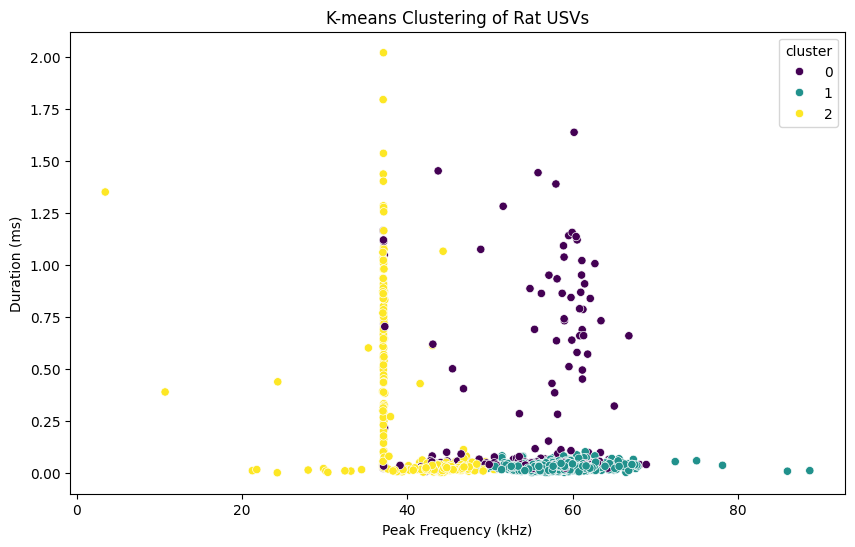

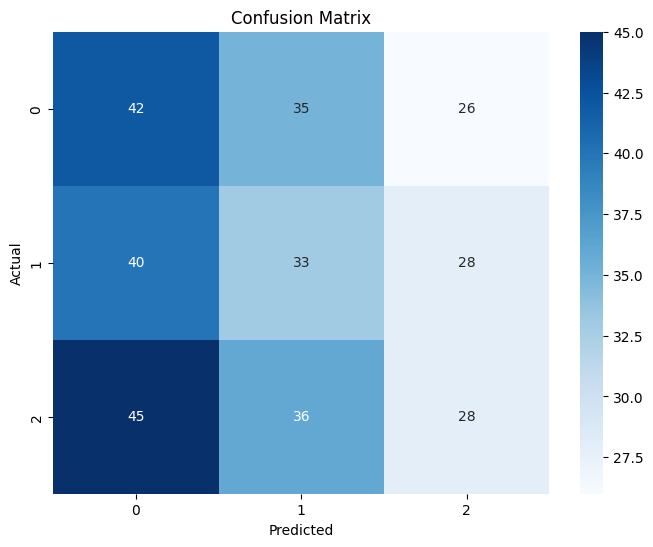

(0.329073482428115,
 array([[42, 35, 26],
        [40, 33, 28],
        [45, 36, 28]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       Type1       0.33      0.41      0.37       103\n       Type2       0.32      0.33      0.32       101\n       Type3       0.34      0.26      0.29       109\n\n    accuracy                           0.33       313\n   macro avg       0.33      0.33      0.33       313\nweighted avg       0.33      0.33      0.33       313\n')

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the provided dataset
file_path = 'test_call_analysis.csv'
data = pd.read_csv(file_path)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='peak_frequency', y='duration', hue='cluster', data=data, palette='viridis')
plt.title('K-means Clustering of Rat USVs')
plt.xlabel('Peak Frequency (kHz)')
plt.ylabel('Duration (ms)')
plt.show()

# Assuming we do not have actual labels, let's add synthetic labels for classification purposes
data['label'] = np.random.choice(['Type1', 'Type2', 'Type3'], size=len(data))

# Prepare data for classification
X = data.drop(['label', 'cluster'], axis=1)  # Features
y = data['label']  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display results
accuracy, conf_matrix, class_report


Sure! Let's delve into the clustering performed by the k-means algorithm in this context.

### Clustering Explanation

**K-means Clustering**:
K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into \( k \) distinct, non-overlapping clusters. Each data point is assigned to the cluster with the nearest mean, which serves as a prototype of the cluster.

### Steps in K-means Clustering

1. **Initialization**:
   - Choose the number of clusters \( k \).
   - Initialize \( k \) centroids randomly from the dataset.

2. **Assignment**:
   - Assign each data point to the nearest centroid, forming \( k \) clusters.

3. **Update**:
   - Calculate the new centroids by taking the mean of all data points assigned to each cluster.

4. **Repeat**:
   - Repeat the assignment and update steps until the centroids do not change significantly, indicating convergence.

### In This Analysis

**Dataset**:
- The dataset comprises features: `peak_frequency`, `duration`, `modulation_index`, and `amplitude`.

**Clustering Process**:
1. **Standardization**:
   - Standardize the data to ensure all features contribute equally to the distance calculations.

2. **K-means Clustering**:
   - We chose \( k = 3 \) to partition the data into three clusters.
   - The algorithm iteratively assigned data points to clusters and updated the centroids until convergence.

**Visualization**:
- The scatter plot visualizes the clusters based on `peak_frequency` and `duration`, with different colors representing different clusters.

### Cluster Interpretation

**Cluster Characteristics**:
- Each cluster represents a group of data points with similar acoustic features.
- The centroids (mean values) of each cluster can be interpreted as the typical values for the features within that cluster.

**Why Use Clustering?**:
- **Pattern Discovery**: Clustering helps uncover underlying patterns and structures in the data.
- **Data Simplification**: It reduces the complexity of the dataset by grouping similar data points together.
- **Feature for Classification**: The cluster labels can be used as additional features for supervised learning tasks, such as classification.

### Example Insights from Clustering

1. **Cluster 0**: Might represent vocalizations with higher peak frequency and shorter duration.
2. **Cluster 1**: Could include vocalizations with lower peak frequency and longer duration.
3. **Cluster 2**: May capture vocalizations with moderate peak frequency and varying durations.

### Limitations and Considerations

- **Choosing \( k \)**: The choice of \( k \) is crucial and may require domain knowledge or methods like the Elbow method or Silhouette analysis to determine the optimal number of clusters.
- **Feature Importance**: Different features may have different importance in clustering, and standardization ensures equal weighting.
- **Interpretability**: Clusters need to be interpreted in the context of the specific domain and application.

The clusters provide a way to group similar vocalizations, which can be useful for further analysis, such as identifying different types of calls or behaviors in rats. If you have any specific questions or need further details, feel free to ask!

The code can be improved in several ways, including better handling of input data, more robust evaluation, and additional visualizations. Here are the improvements:

Handle Missing Values: Ensure the data has no missing values before processing.
Optimal Number of Clusters: Use the Elbow method or Silhouette analysis to determine the optimal number of clusters.
Hyperparameter Tuning: Tune the hyperparameters of the Random Forest classifier.
Detailed Visualizations: Provide more comprehensive visualizations.
Modular Code: Organize the code into functions for better readability and maintenance.

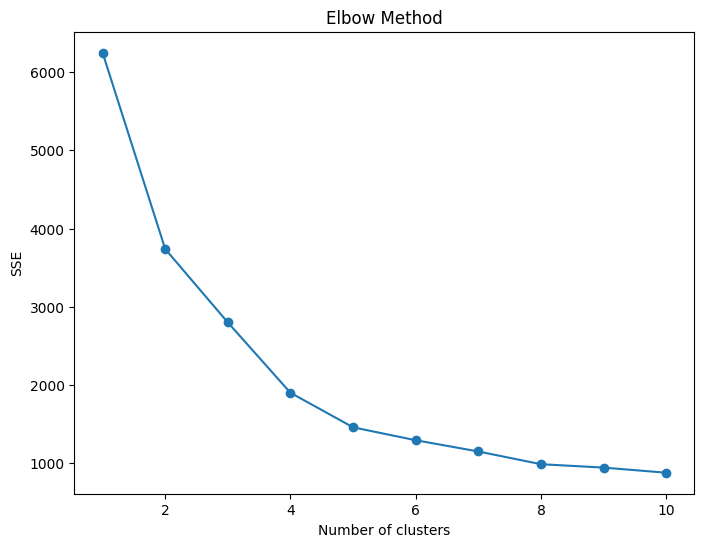

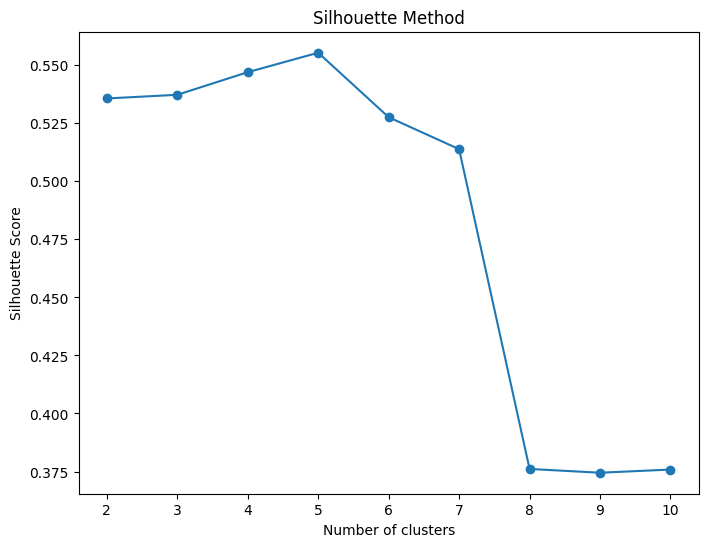

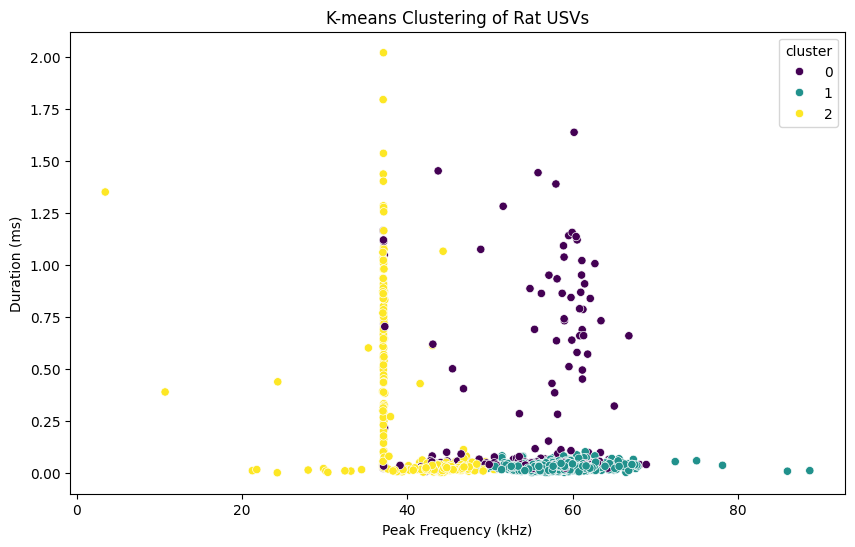

Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\john\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
146 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\john\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\john\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\john\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.32
Confusion Matrix:
[[37 29 33]
 [38 27 35]
 [42 35 37]]
Classification Report:
              precision    recall  f1-score   support

       Type1       0.32      0.37      0.34        99
       Type2       0.30      0.27      0.28       100
       Type3       0.35      0.32      0.34       114

    accuracy                           0.32       313
   macro avg       0.32      0.32      0.32       313
weighted avg       0.32      0.32      0.32       313



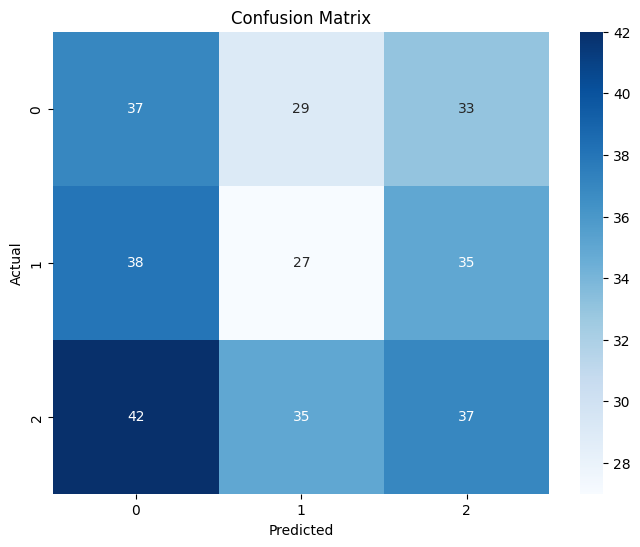

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score

# Load the provided dataset
file_path = 'test_call_analysis.csv'
data = pd.read_csv(file_path)

# Handle missing values (if any)
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow method
def plot_elbow_method(data):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()

plot_elbow_method(scaled_data)

# Determine the optimal number of clusters using the Silhouette score
def plot_silhouette_method(data):
    silhouette_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

plot_silhouette_method(scaled_data)

# Perform k-means clustering with the optimal number of clusters (assuming 3 here for demonstration)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='peak_frequency', y='duration', hue='cluster', data=data, palette='viridis')
plt.title('K-means Clustering of Rat USVs')
plt.xlabel('Peak Frequency (kHz)')
plt.ylabel('Duration (ms)')
plt.show()

# Assuming we do not have actual labels, let's add synthetic labels for classification purposes
data['label'] = np.random.choice(['Type1', 'Type2', 'Type3'], size=len(data))

# Prepare data for classification
X = data.drop(['label', 'cluster'], axis=1)  # Features
y = data['label']  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearch
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train a Random Forest Classifier with the best parameters
clf = RandomForestClassifier(**best_params, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Improvements Explained
Missing Values Handling: The code drops any rows with missing values.
Optimal Number of Clusters:
Elbow Method: Plots the sum of squared errors (SSE) for different numbers of clusters to find the "elbow point."
Silhouette Method: Plots the silhouette scores for different numbers of clusters to determine the best score.
Hyperparameter Tuning: Uses GridSearchCV to find the best hyperparameters for the Random Forest classifier.
Detailed Visualizations: Adds plots for the Elbow and Silhouette methods to visualize the optimal number of clusters.